In [1]:
import pandas as pd
import sys
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 0. Merge partial datasets

In [464]:
f1 = 'Data/202001_android_page_views.csv'

In [465]:
filenames = glob('Data/202001_android_*.csv')
filenames.remove(f1)

In [466]:
for f in filenames:
    print(f)

Data/202001_android_events.csv
Data/202001_android_page_views_per_transaction.csv
Data/202001_android_list_views_per_transaction.csv
Data/202001_android_list_views.csv
Data/202001_android_events_per_transaction.csv
Data/202001_android_leads_per_province.csv
Data/202001_android_frequency.csv
Data/202001_android_registered_users.csv
Data/202001_android_data_raw.csv
Data/202001_android_data_cleansed.csv


In [247]:
print(f1)
df = pd.read_csv(f1)
print(df.shape)
for f in filenames:
    print(f)
    df_aux = pd.read_csv(f)
    print(df_aux.shape)
    df = pd.merge(df, df_aux, on='Marketing_Cloud_Visitor_ID', how='outer')
print('Final Dataser shape:')
print(df.shape)

Data/202001_android_page_views.csv
(1064495, 22)
Data/202001_android_events.csv
(1091816, 41)
Data/202001_android_page_views_per_transaction.csv
(920905, 9)
Data/202001_android_list_views_per_transaction.csv
(679057, 15)
Data/202001_android_list_views.csv
(683262, 8)
Data/202001_android_events_per_transaction.csv
(1022253, 13)
Data/202001_android_leads_per_province.csv
(1019889, 17)
Data/202001_android_frequency.csv
(1092420, 5)
Data/202001_android_registered_users.csv
(223392, 2)
Final Dataser shape:
(1092677, 124)


In [249]:
list(df.columns)

['Marketing_Cloud_Visitor_ID',
 'ad_pay_to_publish',
 'ad_published',
 'blog-detail',
 'confirm_delete_ad',
 'detail',
 'detail_map',
 'forgot_password',
 'general',
 'homepage',
 'login',
 'my_ads',
 'my_alerts_list',
 'my_showcase',
 'privacy_policy',
 'radar',
 'search_filter',
 'search_filter_location',
 'search_filter_suggest',
 'signup',
 'terms_and_conditions',
 'validate_phone',
 'Lead_Confirmation_eMail',
 'Confirmation_Payment',
 'Ad_Filter_Used',
 'Home_Viewed',
 'Lead_Counteroffer_eMail',
 'Ad_Discarded',
 'Ad_Recovered',
 'Mortgage_Button_Clicked',
 'Last_Photo_Viewed',
 'Signed_Out',
 'Lead_Callphone',
 'Social_Auth_Clicked',
 'Rec_Place_Viewed',
 'Rec_Impression',
 'Signed_In',
 'Alert_Added',
 'Ad_Contact_Button',
 'Form_Success',
 'Form_Error',
 'Create_Alert_Button',
 'Profile_Updated',
 'Signed_Up',
 'Ad_Favourited',
 'Ad_Unfavourited',
 'Ad_View',
 'Ad_Impression',
 'Ad_Insertion_Confirmation',
 'Ad_Modification_Confirmation',
 'POI_Clicked',
 'Label_Clicked',
 'Lea

In [251]:
df.to_csv('Data/202001_android_data_raw.csv', index=False)

# 1. First cleansing

In [2]:
# read data and fill with 0s
df = pd.read_csv('Data/202001_android_data_raw.csv', index_col='Marketing_Cloud_Visitor_ID')
print('Dataset Initial shape')
print(df.shape)
df = df.fillna(0)

Dataset Initial shape
(1092677, 123)


In [3]:
df.head(2)

,ad_pay_to_publish,ad_published,blog-detail,confirm_delete_ad,detail,detail_map,forgot_password,general,homepage,login,...,Lead_Counteroffer_eMail_madrid,Lead_View_Phone_barcelona,Lead_View_Phone_big,Lead_View_Phone_little,Lead_View_Phone_madrid,total_active_days,mean_inactive_days,max_inactive_days,min_inactive_days,n_of_user_ids
Marketing_Cloud_Visitor_ID,,,,,,,,,,,,,,,,,,,,,
00000107708722978450827756473807907358,0.0,0.0,0.0,0.0,57.0,5.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17.0,2.0,6.0,1.0,1.0
00000136845845092372076348413986631894,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,7.0,17.0,1.0,0.0


1.1 REMOVE ALL 0'S COLUMNS

In [4]:
# remove zero columns
features = (df != 0).any(axis=0)
print('Data set shape will be:')
print(df.loc[:, features].shape)
print('after removing zeroes columns')

Data set shape will be:
(1092677, 100)
after removing zeroes columns


In [5]:
# save excel file with list of features that have no data
df = df.loc[:, features]
features = features.to_frame(name='In')

In [97]:
features.to_excel('Data/Complements/202020_android_features_status.xlsx')

In [6]:
#print('List of features that stay')
#list(features[features.In==True]['index'])
print('List of features that have no data')
features[features.In==False]

List of features that have no data


,In
Confirmation_Payment,False
Mortgage_Button_Clicked,False
Last_Photo_Viewed,False
Social_Auth_Clicked,False
Rec_Place_Viewed,False
Rec_Impression,False
Create_Alert_Button,False
Profile_Updated,False
Ad_View,False
Ad_Impression,False


1.2 REMOVE ALL 0'S ROWS

In [7]:
# remove columns that are not actions
df_aux = df.copy()
to_remove = ['total_active_days',
 'mean_inactive_days',
 'max_inactive_days',
 'min_inactive_days',
 'n_of_user_ids']
df_aux = df_aux.drop(columns=to_remove)

In [8]:
# remove 0 users
n = len(list(df_aux.columns))
non_bounces = (df_aux == 0).sum(axis=1).to_frame(name='perc_of_zeroes')
df_aux = pd.merge(df_aux, non_bounces, how='inner', on='Marketing_Cloud_Visitor_ID')
df_aux['perc_of_zeroes'] = round ( (df_aux['perc_of_zeroes']/n)*100, 2 )
print('Dataset shape will be:')
print(df_aux[df_aux.perc_of_zeroes!=100].shape)
print('after removing rows with all 0 features')

Dataset shape will be:
(1059036, 96)
after removing rows with all 0 features


Analize frequency features for those users with no action (among selected ones)

In [9]:
# check what we are dropping
df_aux[df_aux.perc_of_zeroes==100].shape

(33641, 96)

In [10]:
to_analyze = list(df_aux[df_aux.perc_of_zeroes==100].index)

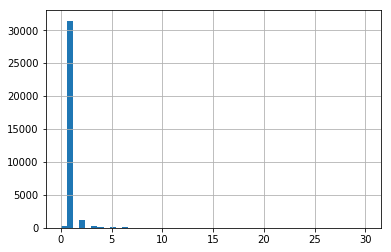

In [11]:
# CHECK
# most ot these users should have low active days
df[df.index.isin(to_analyze)].total_active_days.hist(bins=50)
plt.show()

In [12]:
# include perc of zero into the original dataframe
df = pd.merge(df, df_aux['perc_of_zeroes'], on='Marketing_Cloud_Visitor_ID', how='left')

In [13]:
# drop users with no action
df = df[df.perc_of_zeroes!=100]

1.3 Distribution of Users w.r.t % of 0 features

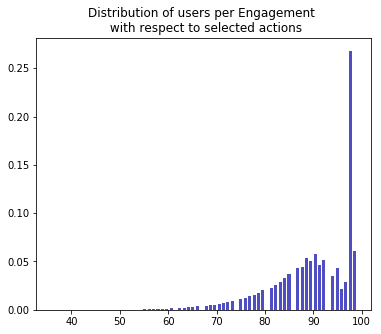

In [23]:
plt.figure(figsize=(6, 5))
plt.hist(df['perc_of_zeroes'], density=1, bins=70, color='#0504aa', alpha=0.7, rwidth=0.70)
plt.title('Distribution of users per Engagement \n with respect to selected actions')
plt.show()

In [36]:
df[(df.perc_of_zeroes<100) & (df.perc_of_zeroes>=98)]

,ad_pay_to_publish,ad_published,blog-detail,confirm_delete_ad,detail,detail_map,forgot_password,general,homepage,login,...,Lead_Counteroffer_eMail_barcelona,Lead_Counteroffer_eMail_big,Lead_Counteroffer_eMail_little,Lead_Counteroffer_eMail_madrid,total_active_days,mean_inactive_days,max_inactive_days,min_inactive_days,n_of_user_ids,perc_of_zeroes
Marketing_Cloud_Visitor_ID,,,,,,,,,,,,,,,,,,,,,
00001458797383785303218207232545704864,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,15.0,19.0,11.0,0.0,98.95
00005473722777211484152819525820790043,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,15.0,20.0,10.0,0.0,98.95
00008211108539528841335279168247692768,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,15.0,23.0,7.0,0.0,98.95
00009117132059695493344907543478877534,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,15.0,17.0,13.0,0.0,98.95
00009820910567669792002455740156226664,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,15.0,22.0,8.0,0.0,98.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71927577036882175671740672027265553045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,15.0,25.0,5.0,0.0,98.95
72920149864478415421647112593588564352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,7.0,12.0,5.0,1.0,98.95
73858263165713391763977706099985757565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,15.0,16.0,14.0,0.0,98.95


Based on the above histogram, select the treshold to isolate where most of outliers users are concentrated

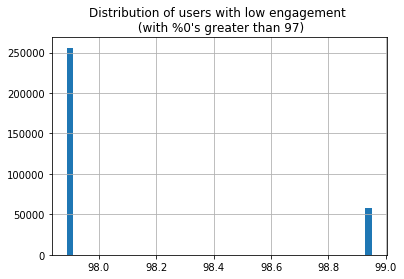

% on the line are:
[97.89, 98.95]


In [26]:
treshold = 97
most = df[df.perc_of_zeroes>=treshold]
plt.title('Distribution of users with low engagement \n (with %0\'s greater than ' 
          + str(treshold) + ')')
hist = most['perc_of_zeroes'].hist(bins=50)
plt.show()
print('% on the line are:')
print(list(most.perc_of_zeroes.unique()))

Delete outliers that have no important action (like leads and favorite) TO BE DONE

In [27]:
df = df[df.perc_of_zeroes<=treshold]

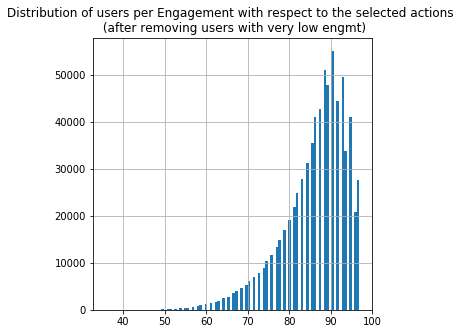

In [28]:
plt.figure(figsize=(5, 5))
plt.title('Distribution of users per Engagement with respect to the selected actions \n (after removing users with very low engmt)')
hist = df['perc_of_zeroes'].hist(bins=100)
plt.show()

In [29]:
df.shape

(745330, 101)

In [114]:
del df['perc_of_zeroes']

## 1.1 Correlation Analysis

In [116]:
# correlation matrix
corr = df.corr()

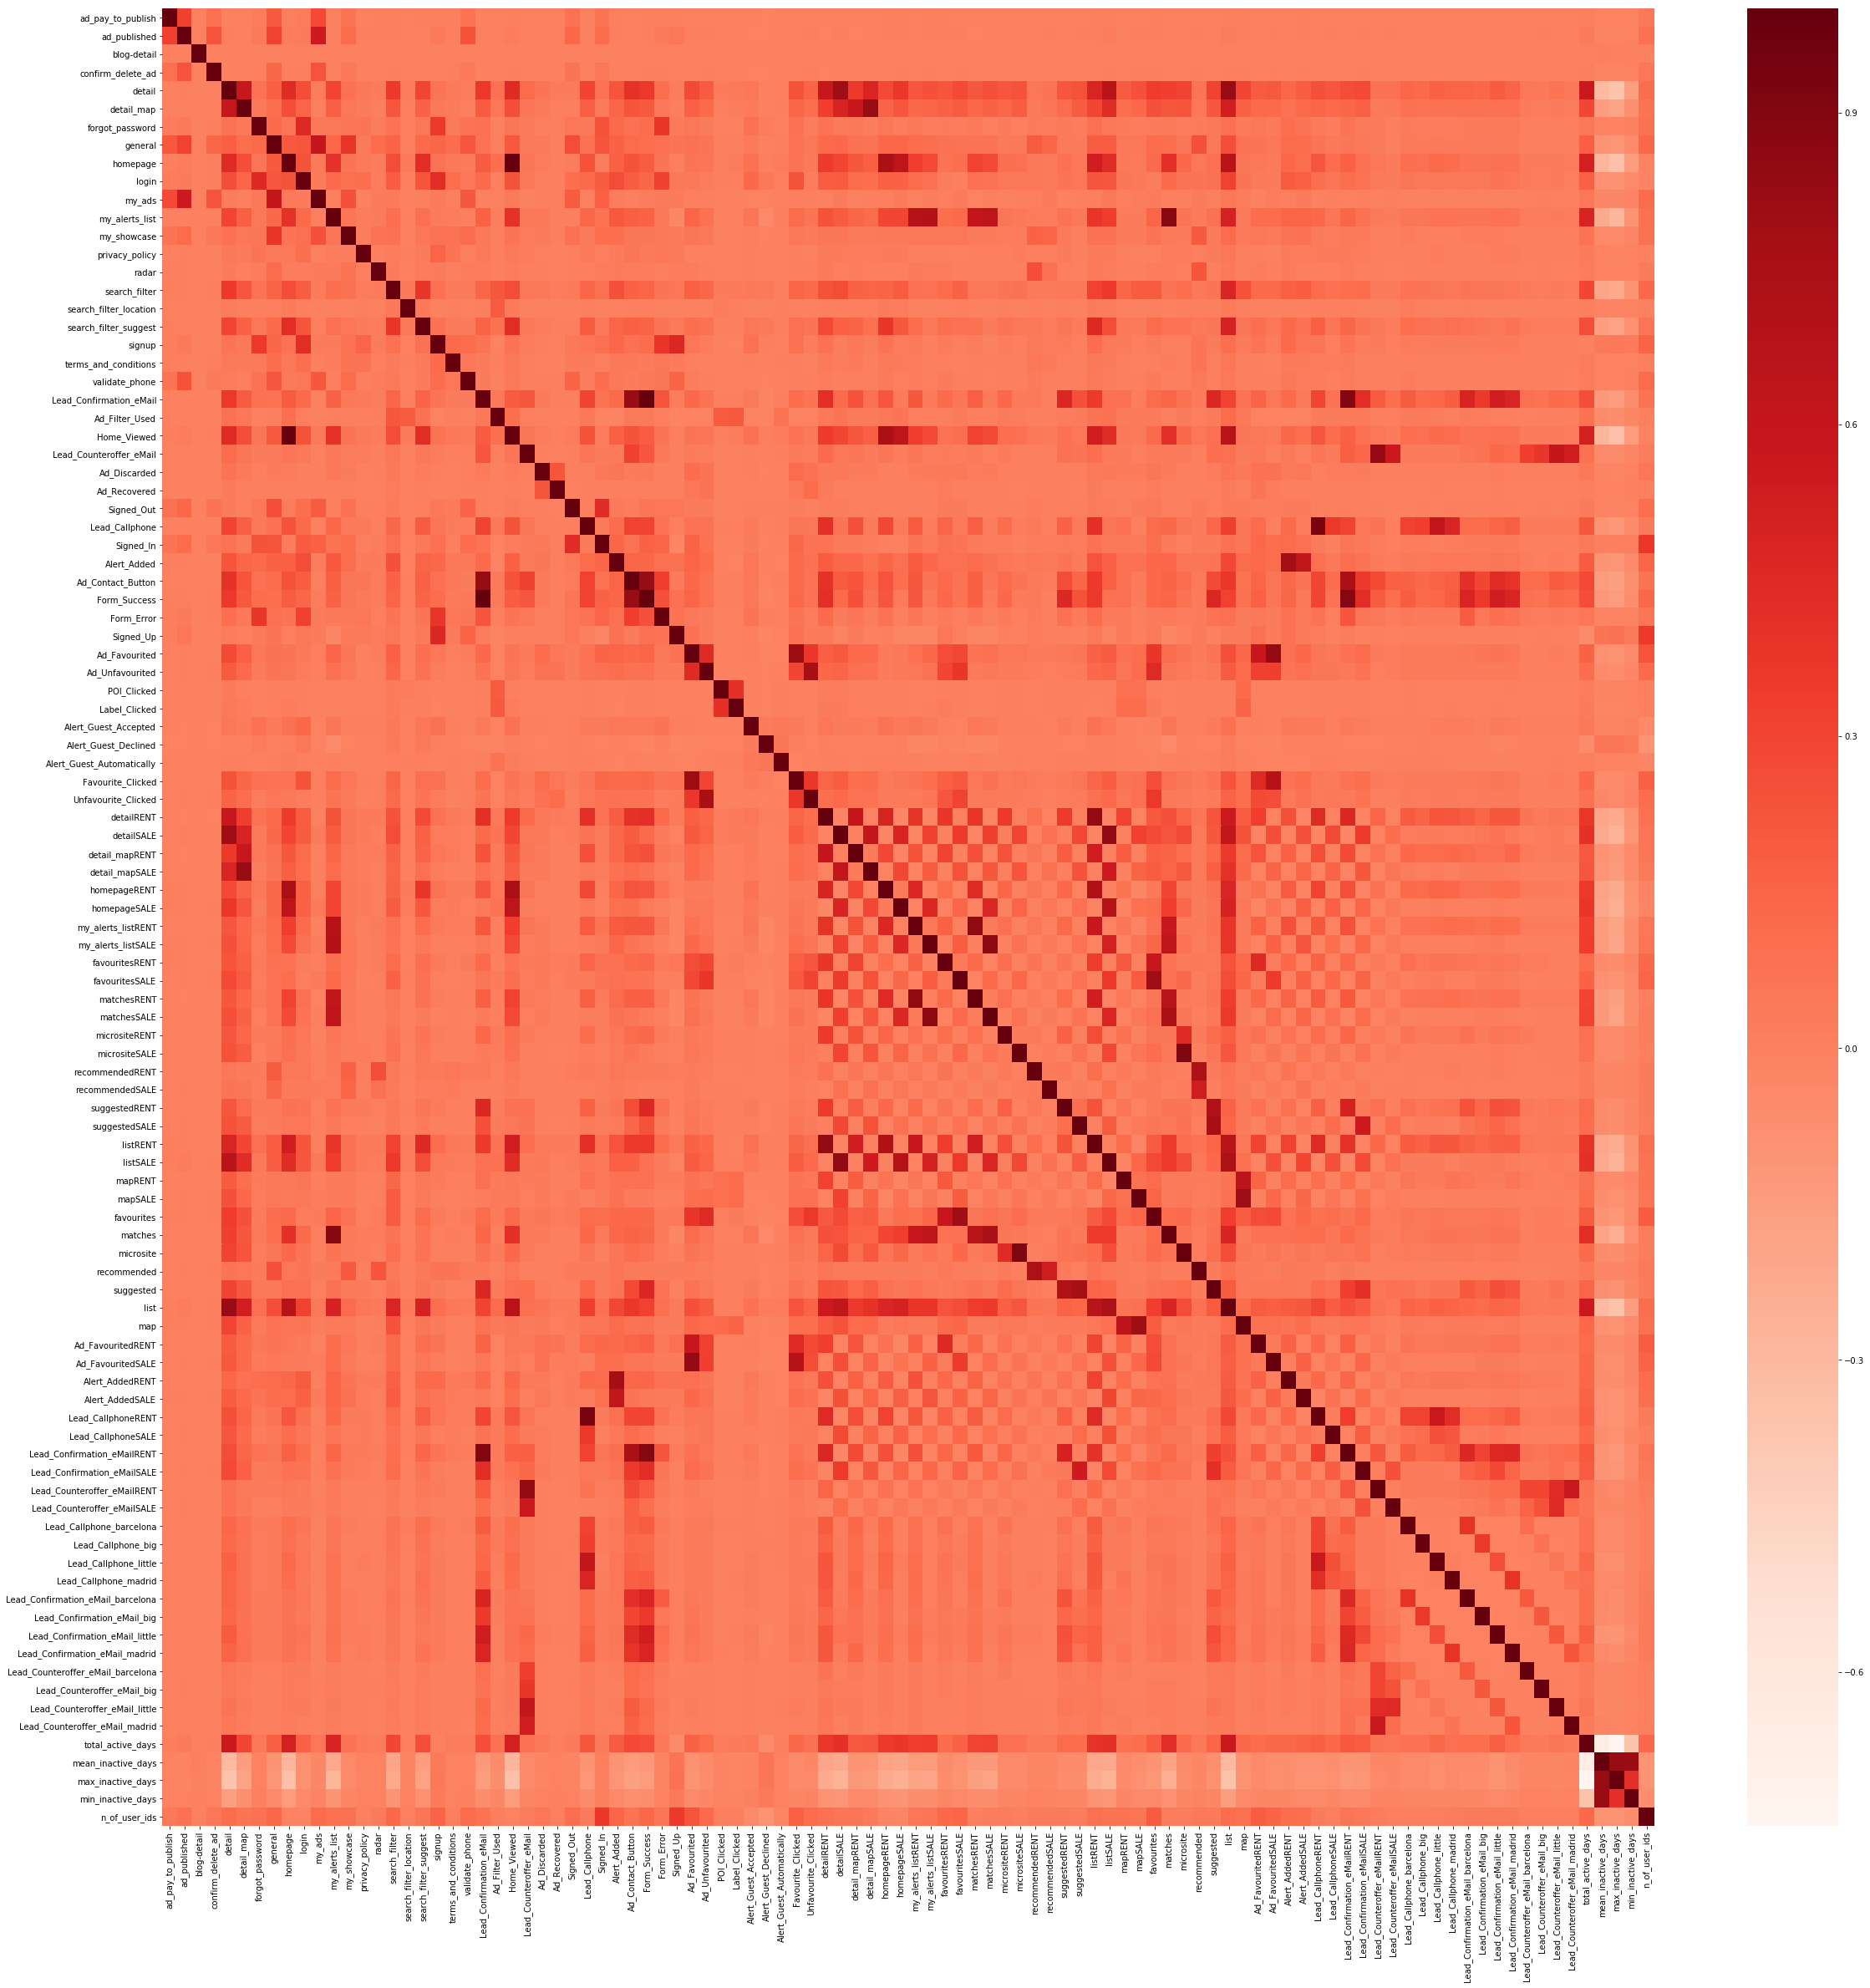

In [490]:
# correlation heatmap
#cmap = sns.palplot(sns.diverging_palette(240, 10, n=9))
fig = plt.figure(figsize=(40, 40))
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, cmap=plt.cm.Reds)
plt.show()

In [117]:
# print correlation couples
s = corr.abs().unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so1 = so.to_frame(name='correlation')
so1.index = so1.index.set_names(['column1','column2'])
so1 = so1[so1.correlation!=1]

In [118]:
print('Pair of columns with high correlation:')
print(so1[so1.correlation>=0.85].shape[0]/2)

Pair of columns with high correlation:
9.0


In [120]:
so1.to_csv('Data/Complements/202001_android_correlation.csv')

In [493]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(so1[so1.correlation>=0.85]) 

,,correlation
column1,column2,
Home_Viewed,homepage,0.999996
homepage,Home_Viewed,0.999996
Form_Success,Lead_Confirmation_eMail,0.993520
Lead_Confirmation_eMail,Form_Success,0.993520
Lead_CallphoneRENT,Lead_Callphone,0.933048
Lead_Callphone,Lead_CallphoneRENT,0.933048
micrositeSALE,microsite,0.912377
microsite,micrositeSALE,0.912377
Lead_Confirmation_eMail,Lead_Confirmation_eMailRENT,0.899131


In [121]:
# We remove ad-hoc columns with high correlation
df = df.drop(columns=['Home_Viewed', 'Form_Success', 'microsite'])

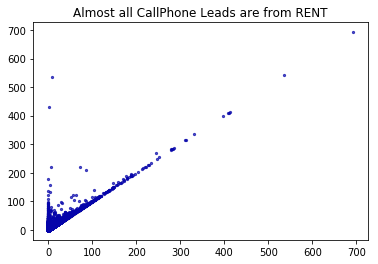

In [35]:
plt.scatter(df['Lead_CallphoneRENT'], df['Lead_Callphone'], s=5, color='#0504aa', alpha=0.7)
plt.title('Almost all CallPhone Leads are from RENT')
plt.show()

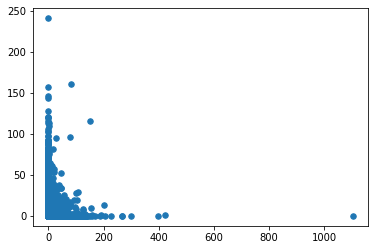

In [136]:
plt.scatter(df['Ad_FavouritedSALE'], df['Ad_FavouritedRENT'], s=30)
plt.show()

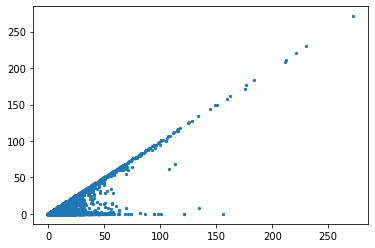

In [130]:
plt.scatter(df['Lead_Confirmation_eMail'], df['Lead_Confirmation_eMailRENT'], s=5)
plt.show()

In [123]:
to_remove = [col for col in df.columns if ('matches' in col)]
print('Following columns will be removed:')
print(to_remove)
df = df.drop(columns=to_remove)

Following columns will be removed:
['matchesRENT', 'matchesSALE', 'matches']


In [124]:
df.shape

(745330, 94)

In [126]:
df.head(2)

,ad_pay_to_publish,ad_published,blog-detail,confirm_delete_ad,detail,detail_map,forgot_password,general,homepage,login,...,Lead_Confirmation_eMail_madrid,Lead_Counteroffer_eMail_barcelona,Lead_Counteroffer_eMail_big,Lead_Counteroffer_eMail_little,Lead_Counteroffer_eMail_madrid,total_active_days,mean_inactive_days,max_inactive_days,min_inactive_days,n_of_user_ids
Marketing_Cloud_Visitor_ID,,,,,,,,,,,,,,,,,,,,,
00000107708722978450827756473807907358,0.0,0.0,0.0,0.0,57.0,5.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17.0,2.0,6.0,1.0,1.0
00000136845845092372076348413986631894,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,7.0,17.0,1.0,0.0


In [127]:
df.to_csv('Data/202001_android_data_cleansed.csv', index=True)

## 1.2 Colinearity

# 2 RENT / SALE Classification

Starting with cleansed data (correlation, co-linearity, % of engagement) we propose a transaction classification method

In [37]:
df = pd.read_csv('Data/202001_android_data_cleansed.csv', index_col='Marketing_Cloud_Visitor_ID')
df.head(2)

,ad_pay_to_publish,ad_published,blog-detail,confirm_delete_ad,detail,detail_map,forgot_password,general,homepage,login,...,Lead_Confirmation_eMail_madrid,Lead_Counteroffer_eMail_barcelona,Lead_Counteroffer_eMail_big,Lead_Counteroffer_eMail_little,Lead_Counteroffer_eMail_madrid,total_active_days,mean_inactive_days,max_inactive_days,min_inactive_days,n_of_user_ids
Marketing_Cloud_Visitor_ID,,,,,,,,,,,,,,,,,,,,,
00000107708722978450827756473807907358,0.0,0.0,0.0,0.0,57.0,5.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17.0,2.0,6.0,1.0,1.0
00000136845845092372076348413986631894,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,7.0,17.0,1.0,0.0


## 2.1 Separate Rent and Sale users with Leads

In [38]:
# define total leads column and remove users with no lead
df_aux = df.copy()
df_aux['actual_leads'] = df_aux['Lead_Confirmation_eMail'] + df_aux['Lead_Callphone'] + df_aux['Lead_Counteroffer_eMail']
df_aux['actual_leadsRENT'] = df_aux['Lead_Confirmation_eMailRENT'] + df_aux['Lead_CallphoneRENT'] + df_aux['Lead_Counteroffer_eMailRENT']
df_aux['actual_leadsSALE'] = df_aux['Lead_Confirmation_eMailSALE'] + df_aux['Lead_CallphoneSALE'] + df_aux['Lead_Counteroffer_eMailSALE']
df_leads = df_aux[['actual_leads','actual_leadsRENT','actual_leadsSALE']]
df_leads = df_leads[df_leads.actual_leads!=0]
df_leads = df_leads[df_leads.notnull()]

In [39]:
df_leads.head(2)

,actual_leads,actual_leadsRENT,actual_leadsSALE
Marketing_Cloud_Visitor_ID,,,
00000107708722978450827756473807907358,1.0,1.0,0.0
00000407524030170034329152187891187137,19.0,19.0,0.0


Total of 192645 users did lead
which is 25.9% of our user sample.
With the choosen treshold of maximum 20 leads per user,
which select 24.7 % of our users sample
we have the following distribution:


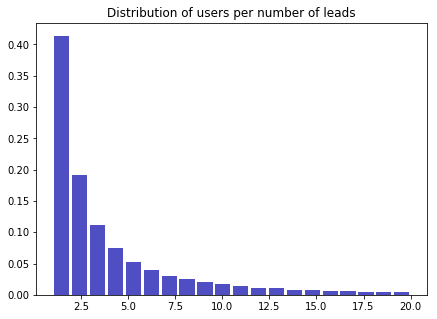

In [59]:
# choose the treshold for number of leads per user to analyze
treshold = 20
df_plot = df_leads[df_leads.actual_leads<=treshold]

print('Total of ' + str(df_leads.shape[0]) + ' users did lead')
perc_leads = df_leads.shape[0]/df.shape[0]*100
print('which is ' + str(round(perc_leads, 1)) + '% of our user sample.' )
print('With the choosen treshold of maximum ' + str(treshold) + ' leads per user,')
perc_leads = df_plot.shape[0]/df.shape[0]*100
print('which select ' + str(round(perc_leads, 1)) + ' % of our users sample')
print('we have the following distribution:')

# plot distributiion
plt.figure(figsize=(7, 5))
plt.title('Distribution of users per number of leads')
plt.hist(df_plot['actual_leads'], density=1, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show()

In [40]:
# Classify RENT and SALE, other_type, and both_types
df_leads.loc[((df_leads['actual_leadsRENT']==0) & (df_leads['actual_leadsSALE']!=0)), 
             'transaction_type'] = 'SALE'
df_leads.loc[((df_leads['actual_leadsSALE']==0) & (df_leads['actual_leadsRENT']!=0)), 
             'transaction_type'] = 'RENT'
df_leads.loc[((df_leads['actual_leadsSALE']==0) & (df_leads['actual_leadsRENT']==0) & 
              (df_leads.actual_leads!=0)), 'transaction_type'] = 'other_type'
df_leads.loc[df_leads['transaction_type'].isnull(), 'transaction_type'] = 'both_types'

In [50]:
df_leads['transaction_type'].value_counts()

RENT          117115
SALE           64527
both_types      7300
other_type      3703
Name: transaction_type, dtype: int64

TypeError: hist() got multiple values for argument 'bins'

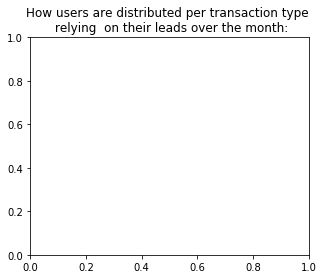

In [70]:
plt.figure(figsize=(5, 4))
plt.title('How users are distributed per transaction type \n relying  on their leads over the month:')
plt.hist((df_leads['transaction_type'].unique(), 
          df_leads['transaction_type'].value_counts()), 2,
         color=('#0504aa','#0504aa'), 
         density=1,
         bins=5,
         alpha=0.7, 
         rwidth=0.70)
#pd.value_counts(df_leads['transaction_type'], normalize=True).plot.bar()
plt.show()
print('Other types are users that have no leads in rent nor sell \n but on other transaction types')

In [76]:
df_rent = df_leads[df_leads.transaction_type=='RENT']
df_sale = df_leads[df_leads.transaction_type=='SALE']

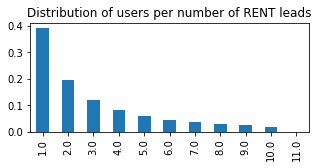

In [77]:
plt.figure(figsize=(5, 2))
# choose the treshold for leads to analyze
treshold = 10
# RENT
df_plot = df_rent[df_rent.actual_leads<=treshold]
plt.title('Distribution of users per number of RENT leads')
pd.value_counts(df_plot['actual_leadsRENT'], normalize=True).plot.bar()

plt.show()

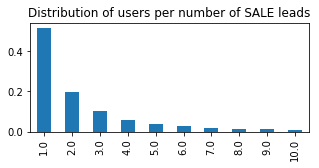

In [78]:
plt.figure(figsize=(5, 2))
# choose the treshold for leads to analyze
treshold = 10
# SALE
df_plot = df_sale[df_sale.actual_leads<=treshold]
plt.title('Distribution of users per number of SALE leads')
pd.value_counts(df_plot['actual_leadsSALE'], normalize=True).plot.bar()
plt.show()

In [79]:
df_leads.to_csv('Data/Complements/202001_Leads_IDs_Rent_Sale.csv', index=True)

In [80]:
df.shape

(744829, 96)

In [81]:
df_leads.shape

(192645, 4)

In [82]:
n = round(1-(df_leads.shape[0]/df.shape[0]), 3)*100
print('Quedan por clasificar el ' + str(n) + '% de los usuarios: los que no hacen leads.')

Quedan por clasificar el 74.1% de los usuarios: los que no hacen leads.


## 2.2 Separate RENT and SALE by other actions

In [200]:
df1 = pd.merge(df_aux, df_leads[['transaction_type']], 
               how='left', on='Marketing_Cloud_Visitor_ID')
aux = round((df1[df1.transaction_type.isnull()].shape[0]/df.shape[0])*100,1)
print('Quedaban para clasificar ' + str(aux) + '% de los usuarios')

Quedaban para clasificar 74.1% de los usuarios


In [201]:
SALE_cols = [col for col in df.columns if ('SALE' in col) & ('Lead' not in col) & ('leads' not in col)]
RENT_cols = [col for col in df.columns if ('RENT' in col) & ('Lead' not in col) & ('leads' not in col)]
print('Lists of features splitted by Rent and Sale, excluding leads \n')
print(list(SALE_cols))
print(list(RENT_cols))

Lists of features splitted by Rent and Sale, excluding leads 

['detailSALE', 'detail_mapSALE', 'homepageSALE', 'my_alerts_listSALE', 'favouritesSALE', 'matchesSALE', 'micrositeSALE', 'recommendedSALE', 'suggestedSALE', 'listSALE', 'mapSALE', 'Ad_FavouritedSALE', 'Alert_AddedSALE']
['detailRENT', 'detail_mapRENT', 'homepageRENT', 'my_alerts_listRENT', 'favouritesRENT', 'matchesRENT', 'micrositeRENT', 'recommendedRENT', 'suggestedRENT', 'listRENT', 'mapRENT', 'Ad_FavouritedRENT', 'Alert_AddedRENT']


Considerando sólo usuarios RENT, vamos a ver qué features de tipo SALE son más atendibles para clasificar por tipo de transacción 

KeyboardInterrupt: 

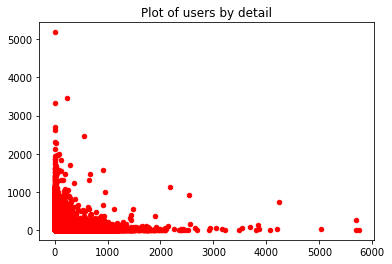

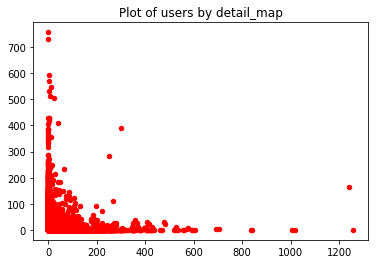

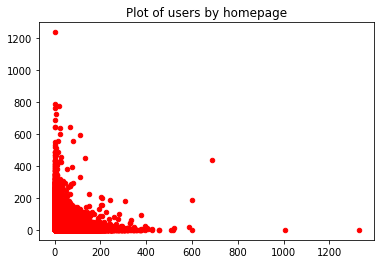

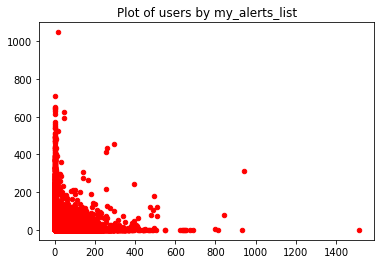

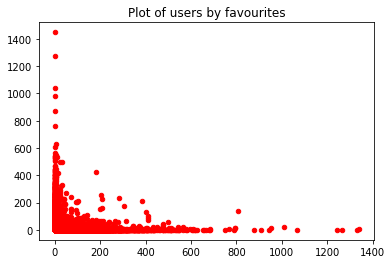

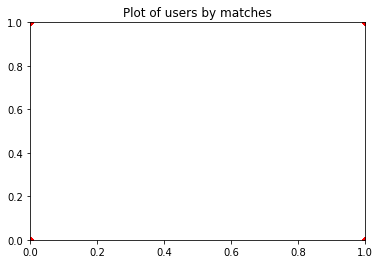

In [168]:
# cuando hay poca dispersión fuera de los 2 ejes, 
# significa que respecto de esa features hay pocos usuarios con doble transacción
# the more users alligned on x-axis, meaning y is 0, more the action is only RENT. And viceversa
for i in range(len(SALE_cols)):
    plt.figure()
    plt.title('Plot of users by ' + SALE_cols[i].replace('SALE',''))
    plt.scatter(df1[SALE_cols[i]], df1[RENT_cols[i]], s=20, c='red')
plt.show()

In [ ]:
for col_SALE in SALE_cols:
    plt.figure()
    plt.title(col_SALE)
    df_plot = df1[(df1.transaction_type=='RENT') & (df1[col_SALE]<=10)]
    pd.value_counts(df_plot[col_SALE], normalize=True).plot.bar()
plt.show()

In [169]:
for i in range(len(SALE_cols)):
    # original column
    col = SALE_cols[i].replace('SALE','')
    if col in df1.columns:
        # select non-zero users w.r.t to the column/action
        aux = df1[df1[col]!=0]
        perc = round(aux[(aux[SALE_cols[i]]!=0) & (aux[SALE_cols[i]]!=0)].shape[0]/aux.shape[0],3)
        perc = round(perc*100, 1)
        print(str(perc) + ' % of non-classifiable users  ' + col)

55.8 % of non-classifiable users  detail
52.9 % of non-classifiable users  detail_map
40.9 % of non-classifiable users  homepage
42.6 % of non-classifiable users  my_alerts_list
52.7 % of non-classifiable users  favourites
36.1 % of non-classifiable users  recommended
45.8 % of non-classifiable users  suggested
53.9 % of non-classifiable users  list
51.1 % of non-classifiable users  map
54.3 % of non-classifiable users  Ad_Favourited
39.7 % of non-classifiable users  Alert_Added


Muy interesante: Para cada página, cuántos usuarios hay que se pueden dividir en Rent y Sale que ya no lo están por lead

seleccionamos el orden del funnel empezando de lo más cercano a lead, para poder clasificar entre tipo de transacción

In [202]:
selected_order = ['Ad_FavouritedSALE','recommendedSALE', 'my_alerts_listSALE',
                  'Alert_AddedSALE', 
                  'homepageSALE', 
                 'suggestedSALE',
                  'mapSALE', 
                  'detail_map',
                  'favouritesSALE',
                  'listSALE',
                 'detailSALE']

In [184]:
col = 'detailSALE'
colSALE = col
colRENT = col.replace('SALE','RENT')
col = colSALE.replace('SALE','')

In [191]:
colSALE

'detailSALE'

In [186]:
aux = df1[df1['transaction_type'].isnull()]
aux = aux[(aux[col]!=0)]

In [189]:
aux[aux.detail==0]

,ad_pay_to_publish,ad_published,blog-detail,confirm_delete_ad,detail,detail_map,forgot_password,general,homepage,login,...,Lead_Counteroffer_eMail_madrid,total_active_days,mean_inactive_days,max_inactive_days,min_inactive_days,n_of_user_ids,actual_leads,actual_leadsRENT,actual_leadsSALE,transaction_type
Marketing_Cloud_Visitor_ID,,,,,,,,,,,,,,,,,,,,,


In [192]:
aux = aux[aux[colRENT]+aux[colSALE]==aux[col]]

In [193]:
aux[[colRENT, colSALE, col]]

,detailRENT,detailSALE,detail
Marketing_Cloud_Visitor_ID,,,
00000136845845092372076348413986631894,1.0,0.0,1.0
00000444340315997753518969286832417916,0.0,34.0,34.0
00000630229631893432133166794739701486,2.0,0.0,2.0
00000885255278034574416827464210608008,13.0,0.0,13.0
00000936443832161521065925466527510504,6.0,13.0,19.0
...,...,...,...
92233151965890087714062667257538062971,5.0,0.0,5.0
92233171396717710691014732193589690835,0.0,2.0,2.0
92233369132305222200586532242468455900,8.0,0.0,8.0


In [203]:
for col in selected_order:
    colSALE = col
    colRENT = col.replace('SALE','RENT')
    col = colSALE.replace('SALE','')
    aux = df1[df1['transaction_type'].isnull()]
    aux = aux[(aux[col]!=0)]
    aux = aux[aux[colRENT]+aux[colSALE]==aux[col]]
    aux.loc[(aux[colRENT]==0) & (aux[colSALE]!=0), 
             ('transaction_type')] = 'SALE'
    aux.loc[(aux[colSALE]==0) & (aux[colRENT]!=0), 
             ('transaction_type')] = 'RENT'
    print(colSALE)
    print(aux.loc[(aux[colRENT]==0) & (aux[colSALE]!=0)].shape[0])
    print(colRENT)
    print(aux.loc[(aux[colRENT]!=0) & (aux[colSALE]==0)].shape[0])
    aux = pd.DataFrame(aux['transaction_type'])
    aux = aux.rename(columns={'transaction_type':'transaction_aux'})
    df1 = pd.merge(df1, aux, on='Marketing_Cloud_Visitor_ID', how='left')
    df1.transaction_type.fillna(df1.transaction_aux, inplace=True) 
    del df1['transaction_aux']

Ad_FavouritedSALE
17802
Ad_FavouritedRENT
11896
recommendedSALE
1123
recommendedRENT
1463
my_alerts_listSALE
19973
my_alerts_listRENT
25607
Alert_AddedSALE
10778
Alert_AddedRENT
14696
homepageSALE
47288
homepageRENT
48779
suggestedSALE
76
suggestedRENT
123
mapSALE
17789
mapRENT
19135
detail_map
0
detail_map
0
favouritesSALE
2438
favouritesRENT
1939
listSALE
65633
listRENT
117611
detailSALE
21857
detailRENT
8177


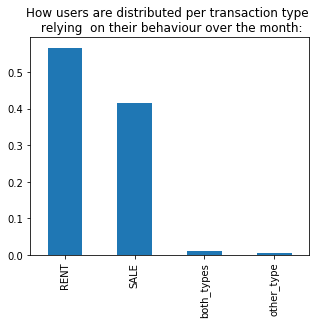

Other types are users that have no leads in rent nor sell 
 but on other transaction types


In [204]:
plt.figure(figsize=(5, 4))
plt.title('How users are distributed per transaction type \n relying  on their behaviour over the month:')
pd.value_counts(df1['transaction_type'], normalize=True).plot.bar()
plt.show()
print('Other types are users that have no leads in rent nor sell \n but on other transaction types')

In [205]:
aux = round(df1[df1.transaction_type.isnull()].shape[0]/df1.shape[0]*100,1)
print('Quedan sin clasificar ' + str(aux) + '% de los usuarios')

Quedan sin clasificar 13.2% de los usuarios


In [206]:
# check the format before saving to csv
pd.DataFrame(df1['transaction_type']).head(2)

,transaction_type
Marketing_Cloud_Visitor_ID,
00000107708722978450827756473807907358,RENT
00000136845845092372076348413986631894,RENT


In [207]:
df1.shape

(744829, 100)

In [208]:
pd.DataFrame(df1['transaction_type']).to_csv("Data/Complements/202001_IDs_per_transactions.csv", index=True)

In [193]:
# check you save in the correct format
#pd.read_csv("Data/Complements/202001_IDs_per_transactions.csv", index_col='Marketing_Cloud_Visitor_ID').head(2)

,transaction_type
Marketing_Cloud_Visitor_ID,
00000107708722978450827756473807907358,RENT
00000136845845092372076348413986631894,RENT


# 1.3 Geography Analysis